In [23]:
from tensorflow.keras.models import load_model

model = load_model('digitmodel.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 128)              

(3, 3, 1, 32)
[[0.03 0.16 0.04]
 [0.09 0.2  0.15]
 [0.14 0.08 0.08]]


([], [])

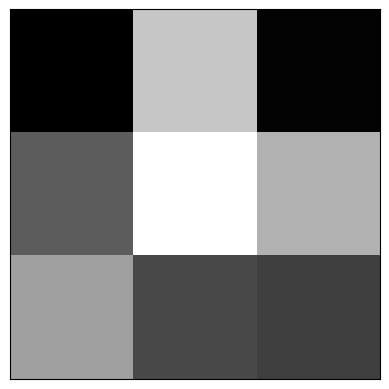

In [24]:
import matplotlib.pyplot as plt

model_layer_idx = 0

kernels, biases = model.layers[model_layer_idx].get_weights()
print(kernels.shape)

kernel_idx = 0
kernel_i = kernels[:, :, 0, kernel_idx]
print(kernel_i.round(2))

plt.imshow(kernel_i, cmap='gray')
plt.xticks([])
plt.yticks([])

img shape :  (28, 28)
max pixel value :  255
Expandim:  (1, 28, 28)
1/1 [==============================] - 0s 52ms/step
[[0.    0.    0.996 0.    0.    0.    0.    0.    0.004 0.   ]]

Predicted Number =  2


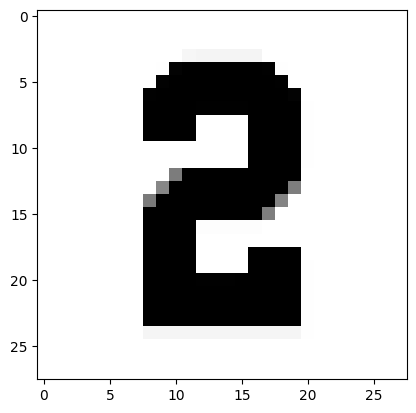

In [25]:
from tensorflow.image import rgb_to_grayscale
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('DataSet/Two.jpg')

# print(image.shape)

re_image = cv2.resize(image, (28,28))
# Convert BGR image to RGB
rgb_image = cv2.cvtColor(re_image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)

img = cv2.bitwise_not(rgb_image)
img = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

print('img shape : ',img.shape)
print('max pixel value : ', np.max(img))

img = img / 255.0

img = np.expand_dims(img, axis=0)
print("Expandim: ",img.shape)

y_pred = model.predict(img)
print(y_pred.round(3))

prediction = np.argmax(y_pred, -1)

print('\nPredicted Number = ', prediction[0])
